**Definition of each column** :
- MEMBER_NO : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal penerbangan pertama
- GENDER : Jenis kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara asal
- AGE : Umur customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT = Jumlah penerbangan customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yang sudah dilakukan
- LAST_FLIGHT_DATE : tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : rata-rata jarak waktu
- MAX_INTERVAL : maksimal jarak waktu
- EXCHANGE_COUNT = Jumlah penukaran
- avg_discount : rata-rata discount yang didapat customer
- Points_Sum : jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members 

## Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**conclusion** : 
- 62988 row
- 23 columns
- terdapat beberapa fitur yang nilainya null

### separated numerical dan categorical data

In [4]:
numeric = ['int64', 'float64']
numerical = df.select_dtypes(include=numeric)
numerical.head()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,28065,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,55106,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,21189,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,39546,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39


In [5]:
categorical = df.select_dtypes(include='object')
categorical.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,3/31/2014
1,2/19/2007,8/3/2007,Male,NaN,beijing,CN,3/31/2014,3/25/2014
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,3/21/2014
3,8/22/2008,8/23/2008,Male,Los Angeles,CA,US,3/31/2014,12/26/2013
4,4/10/2009,4/15/2009,Male,guiyang,guizhou,CN,3/31/2014,3/27/2014


### univariate analysis numerical

In [6]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**conclusion** : terdapat beberapa fitur yang memiliki outliers, terlihat pada perbedaan median dan mean yang cukup jauh

In [8]:
numerical = ['AGE', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']

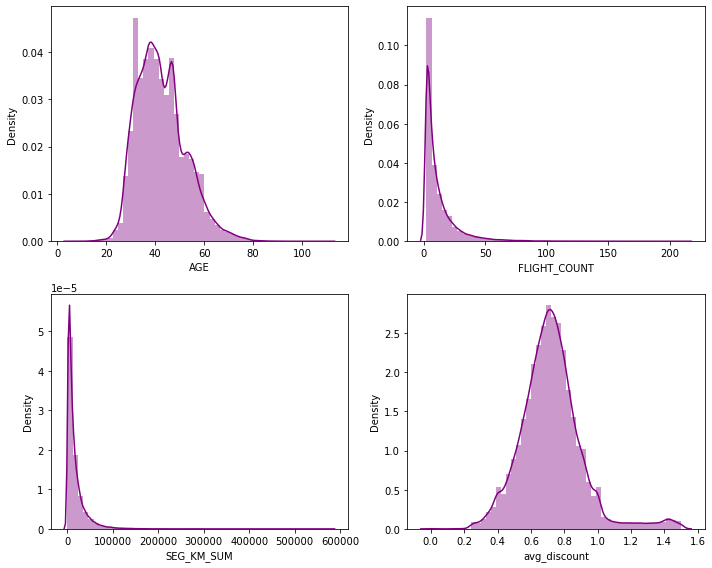

In [9]:
plt.figure(figsize=(10,8))
for i in range(0, len(numerical)):
    plt.subplot(2, len(numerical)/2, i+1)
    sns.distplot(df[numerical[i]], color='purple')
    plt.tight_layout()

**conclusion** : feature AGE dan avg_discount distrubusinya cukup normal sedangkan feature FLIGHT_COUNT dan SEG_KM_SUM skewed positif (terdapat outliers di bagian kanan)

### univariate analysis categorical

In [12]:
categorical = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

In [14]:
gender = df['GENDER'].value_counts().reset_index()
gender.columns = ['feature', 'freq']
gender['percentage'] = round(gender['freq']/len(df)*100,2)
gender.sort_values('percentage', ascending=False)

,feature,freq,percentage
0,Male,48134,76.42
1,Female,14851,23.58


In [10]:
work_city = df['WORK_CITY'].value_counts().reset_index()
work_city.columns = ['feature', 'freq']
work_city['percentage'] = round(work_city['freq']/len(df)*100,2)
work_city.sort_values('percentage', ascending=False)
work_city.head(10)

,feature,freq,percentage
0,guangzhou,9386,14.90
1,beijing,7845,12.45
2,shanghai,5001,7.94
3,shenzhen,3605,5.72
4,dalian,1979,3.14
5,shenyang,1626,2.58
6,changchun,1528,2.43
7,wulumuqi,1471,2.34
8,wuhan,1156,1.84
9,haerbin,945,1.50


In [11]:
work_province = df['WORK_PROVINCE'].value_counts().reset_index()
work_province.columns = ['feature', 'freq']
work_province['percentage'] = round(work_province['freq']/len(df)*100,2)
work_province.sort_values('percentage', ascending=False)
work_province.head(10)

,feature,freq,percentage
0,guangdong,17509,27.80
1,beijing,8014,12.72
2,shanghai,4998,7.93
3,liaoning,4182,6.64
4,xinjiang,2512,3.99
5,jilin,1823,2.89
6,heilongjiang,1429,2.27
7,hubei,1377,2.19
8,henan,1187,1.88
9,jiangsu,1113,1.77


In [12]:
work_country = df['WORK_COUNTRY'].value_counts().reset_index()
work_country.columns = ['feature', 'freq']
work_country['percentage'] = round(work_country['freq']/len(df)*100,2)
work_country.sort_values('percentage', ascending=False)
work_country.head(10)

,feature,freq,percentage
0,CN,57748,91.68
1,HK,991,1.57
2,JP,875,1.39
3,KR,790,1.25
4,US,575,0.91
5,TW,281,0.45
6,SG,281,0.45
7,AU,271,0.43
8,MY,161,0.26
9,PH,137,0.22


**conclusion:** customer kebanyakan pria yang berasal dari kota guangzhou, provinsi guangdong, negara china

### check missing value

In [13]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [14]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature', 'missing_value']
data_null['percentage'] = round(data_null['missing_value']/len(df)*100,2)
data_null = data_null[data_null['percentage']>0]
data_null.sort_values('percentage', ascending=False)

,feature,missing_value,percentage
6,WORK_PROVINCE,3248,5.16
5,WORK_CITY,2269,3.60
12,SUM_YR_1,551,0.87
8,AGE,420,0.67
13,SUM_YR_2,138,0.22
7,WORK_COUNTRY,26,0.04


**conclusion:** karena persentase data yang null hanya sedikit, maka data ini bisa dihapus

### multivariate analysis

<AxesSubplot:>

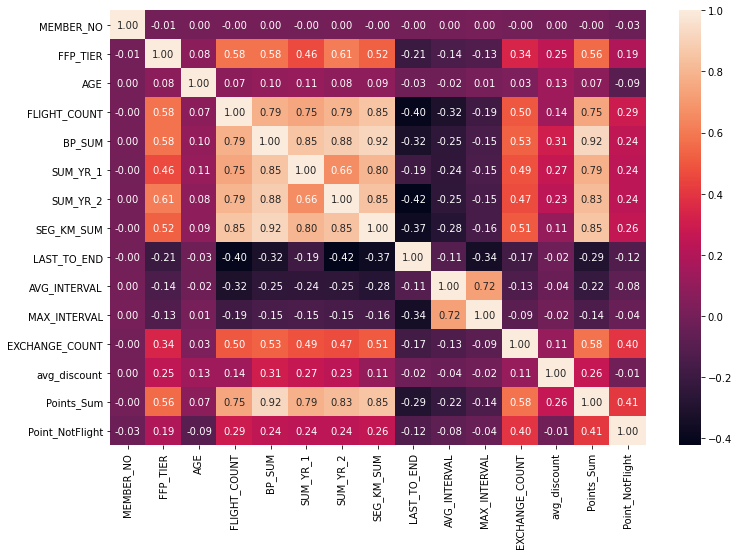

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**conclusion** : 
- ada beberapa fitur yang berkorelasi kuat positif(ex:flight_count dengan points_sum, flight_count dengan seg_km_sum, dll)
- ada juga yang berkorelasi lemah hingga tidak berkorelasi (ex:korelasi dengan age, korelasi dengan max_interval)

## Data Preprocessing

### hapus missing value

In [16]:
df.dropna(inplace=True)

### feature selection
**metode RFM**
- Recency : jarak dari customer terakhir kali betransaksi (LAST_TO_END)
- Frequency : berapa kali customer bertransaksi (FLIGHT_COUNT)
- Monetary : berapa uang yang sudah dihabiskan customer untuk bertransaksi (SEG_KM_SUM)

In [17]:
data_RFM = pd.DataFrame()
data_RFM['R'] = df['LAST_TO_END']
data_RFM['F'] = df['FLIGHT_COUNT']
data_RFM['M'] = df['SEG_KM_SUM']

In [18]:
data_RFM.head()

,R,F,M
0,1,210,580717
2,11,135,283712
3,97,23,281336
4,5,152,309928
5,79,92,294585


### check duplicated data

In [19]:
data_RFM.duplicated().sum()

355

In [20]:
data_RFM.drop_duplicates(inplace=True)

In [81]:
data_RFM.shape

(57900, 3)

### outliers

In [21]:
features = list(data_RFM)

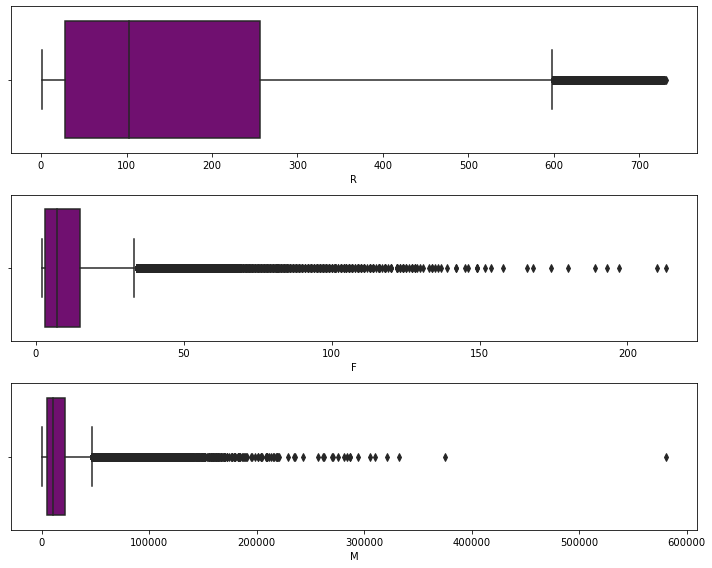

In [22]:
plt.figure(figsize=(10,8))
for i in range(0, len(features)):
    plt.subplot(3, len(features)/3, i+1)
    sns.boxplot(data_RFM[features[i]], color='purple')
    plt.tight_layout()

### log transform untuk membuat distribusi data menjadi lebih normal

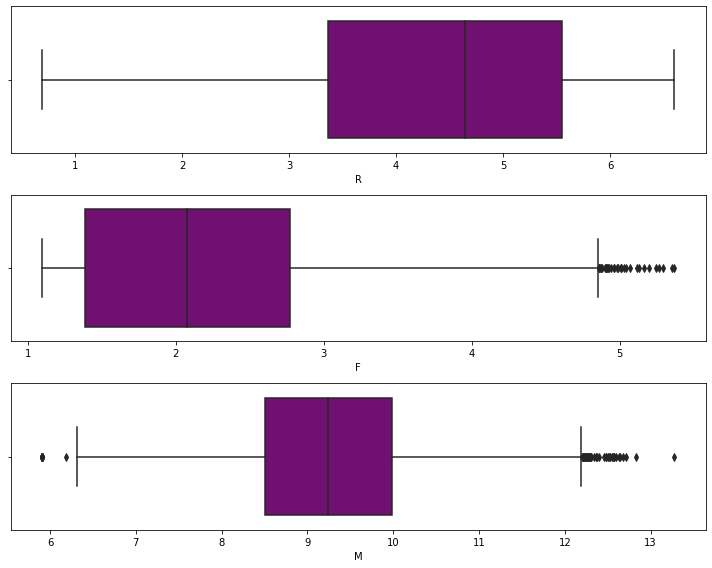

In [23]:
plt.figure(figsize=(10,8))
for i in range(0, len(features)):
    plt.subplot(3, len(features)/3, i+1)
    sns.boxplot(np.log1p(data_RFM[features[i]]), color='purple')
    plt.tight_layout()

### hapus outliers dengan IQR Method

In [25]:
Q1 = data_RFM['F'].quantile(0.25)
Q3 = data_RFM['F'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_RFM['F'] >= low_limit) & (data_RFM['F'] <= high_limit))
data_RFM = data_RFM[filtered_entries]

Q1 = data_RFM['M'].quantile(0.25)
Q3 = data_RFM['M'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_RFM['M'] >= low_limit) & (data_RFM['M'] <= high_limit))
data_RFM = data_RFM[filtered_entries]

In [26]:
data_RFM.shape

(51170, 3)

### Scaling

In [27]:
data_RFM_std = StandardScaler().fit_transform(data_RFM)
scaled_data_RFM = pd.DataFrame(data_RFM_std, columns=list(data_RFM))
scaled_data_RFM.head()

,R,F,M
0,-0.960166,3.412367,3.047823
1,-0.889087,2.961096,2.970801
2,-0.987504,3.562791,3.038491
3,-0.992972,2.058553,3.010381
4,-0.856281,2.961096,2.885009


## Find the best K

<AxesSubplot:>

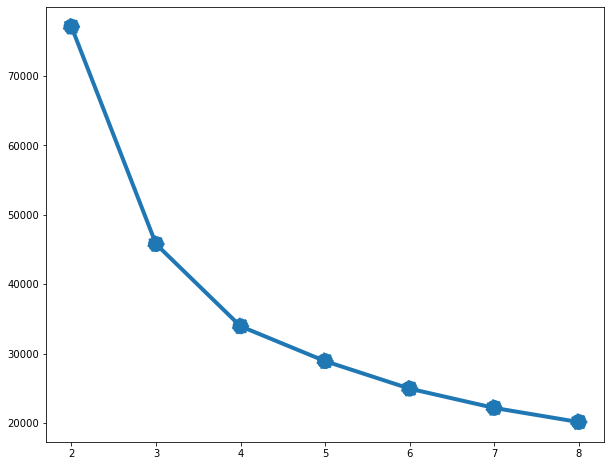

In [28]:
inertia = []

for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data_RFM)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
sns.lineplot(x=range(2,9), y=inertia, linewidth=4)
sns.scatterplot(x=range(2,9), y=inertia, s=300, linestyle='--')

**conclusion** : dari hasil elbow method diatas terlihat bahwa jumlah K yang sesuai yaitu 4. Oleh karena itu, akan dibuat model dengan 4 cluster

## Clustering

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(scaled_data_RFM)
scaled_data_RFM['clusters'] = kmeans.labels_
data_RFM['clusters'] = kmeans.labels_

### Visualisasi Clustering

In [32]:
pca = PCA(n_components=2)

pca.fit(scaled_data_RFM)
pcs = pca.transform(scaled_data_RFM)

data_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

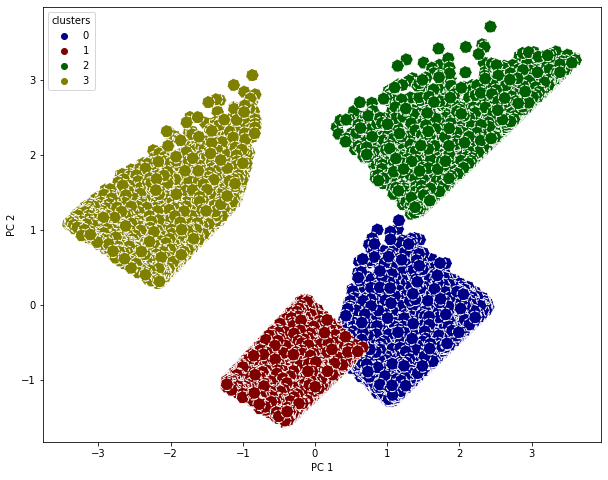

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(
    x= 'PC 1',
    y = 'PC 2',
    hue='clusters',
    edgecolor='white',
    linestyle = '--',
    data = data_pca,
    palette = ['#000087','#800000','#005f00', '#808000'],
    s=160,
    ax=ax
)

In [34]:
display(data_RFM.groupby('clusters').agg(['mean','median']))

R                 F                    M       
                mean median       mean median          mean median
clusters                                                          
0          96.451558     70  11.444940     11  16658.158138  15934
1         124.280444    115   4.562929      4   6152.898636   5856
2          58.262065     31  21.509936     21  28138.038249  28057
3         479.143998    469   3.609512      3   5473.256932   4302

In [35]:
cluster_distribution = data_RFM['clusters'].value_counts().reset_index()
cluster_distribution.columns = ['clusters','number of users']
cluster_distribution

,clusters,number of users
0,1,20086
1,0,12995
2,3,11396
3,2,6693


**conclusion** : 
Setelah melakukan evaluasi jumlah cluster, data kembali kita plot ke grafik PC untuk melihat sebaran data dalam empat cluster yang sudah dimodeling.

- Cluster 0 adalah penumpang yang memiliki rentang waktu rata-rata 96 hari yang lalu dari waktu pemesanan terakhir, jumlah penerbangan rata-rata 11x, total jarak penerbangan sekitar 16658 km. 
- Cluster 1 adalah penumpang yang memiliki rentang waktu rata-rata 124 hari dari pemesanan terakhir, jumlah rata-rata penenrbangan 4x, total jarak penerbangan sekitar 6152 km. 
- Cluster 2 adalah penumpang yang memiliki rentang waktu rata-rata 58 hari dari pemesanan terakhir, jumlah rata-rata penenrbangan 21x, total jarak penerbangan sekitar 28138 km.
- Cluster 3 adalah penumpang yang memiliki rentang waktu rata-rata 479 hari dari pemesanan terakhir, jumlah rata-rata penenrbangan 3x, total jarak penerbangan sekitar 5473 km.